In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('high_diamond_ranked_10min.csv') # importing data 
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [2]:
from sklearn.model_selection import train_test_split
blue_win = data['blueWins']
x = data
x = x.drop(columns = "blueWins")
x = x.drop(columns = "gameId")
X_train , X_test , y_train , y_test = train_test_split(x , blue_win , test_size=0.3) 
#prepearing data and splitting it for train and test 


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(X_train , y_train)
blue_win_pred = clf.predict(X_test)
score = accuracy_score(blue_win_pred , y_test)
print("score at default parameters = " , score)


/Users/andrewshandybin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score at default parameters =  0.6950067476383266


In [73]:
scores_estimators = np.array([])
n_estimators = np.array([])
clf = RandomForestClassifier(n_estimators = 20 , warm_start=True)
for i in range (200):
    clf.fit(X_train , y_train)
    scores_i = np.array([])
    for j in range (10):
        pred = clf.predict(X_test)
        scores_i = np.append(scores_i , accuracy_score(pred , y_test))
    print(np.mean(scores_i))
    params = clf.get_params()
    clf.set_params(n_estimators = params['n_estimators'] + 20)
    scores_estimators = np.append(scores_estimators , np.mean(scores_i))
    n_estimators = np.append(n_estimators , i*20 + 20)
    print(i)

0.7071524966261808
0
0.7128879892037787
1
0.7125506072874492
2
0.7165991902834008
3
0.7196356275303643
4
0.7199730094466936
5
0.7213225371120108
6
0.724021592442645
7
0.7230094466936572
8
0.7192982456140351
9
0.7219973009446694
10
0.7243589743589743
11
0.7213225371120108
12
0.7216599190283401
13
0.7226720647773279
14
0.7230094466936572
15
0.7213225371120108
16
0.7206477732793523
17
0.7192982456140351
18
0.7219973009446694
19
0.7206477732793523
20
0.7223346828609987
21
0.7230094466936572
22
0.7226720647773279
23
0.7216599190283401
24
0.7213225371120108
25
0.7192982456140351
26
0.7216599190283401
27
0.7192982456140351
28
0.7182860998650471
29
0.7199730094466936
30
0.7172739541160594
31
0.7192982456140351
32
0.7182860998650471
33
0.7186234817813765
34
0.7182860998650471
35
0.718960863697706
36
0.7186234817813765
37
0.718960863697706
38
0.718960863697706
39
0.7192982456140351
40
0.718960863697706
41
0.7199730094466936
42
0.718960863697706
43
0.7182860998650471
44
0.7182860998650471
45
0.71

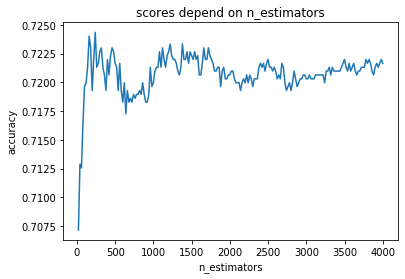

In [81]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.title('scores depend on n_estimators')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.plot(n_estimators, scores_estimators)
plt.show()
fig.savefig("foo_0.png", bbox_inches='tight', dpi=600)

In [39]:
best_estimators = n_estimators[np.argmax(scores_estimators)]
print(best_estimators)



520.0


In [46]:
params_overall = np.array([])
criterions = np.array(["entropy" , "gini"])
features = np.array(["sqrt" , "log2"])
scores_overall = np.array([])
for max_depth in range(3 , 11):
    for min_samples_leaf in range (1 , 5):
        for criterion in criterions:
            for feature in features:
                scores_i = np.array([])
                for i in range (10): 
                    clf = RandomForestClassifier(n_estimators = 520 , max_depth = max_depth , min_samples_leaf = min_samples_leaf , criterion = criterion , max_features = feature)
                    clf.fit(X_train , y_train)
                    pred = clf.predict(X_test)
                    scores_i = np.append(scores_i , accuracy_score(pred , y_test))
                    if (i == 1):
                        params = clf.get_params
                        params_overall = np.append(params_overall , params)      
                scores_overall = np.append(scores_overall , np.mean(scores_i))
                print(max_depth)
                
                
                

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


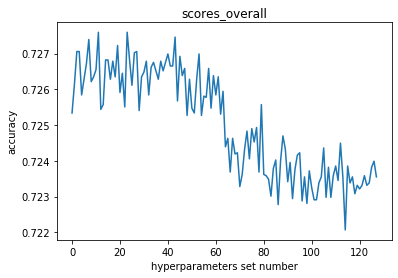

In [80]:
a = np.arange(128)
fig = plt.figure()
plt.title('scores_overall')
plt.ylabel('accuracy')
plt.xlabel('hyperparameters set number')
plt.plot(a, scores_overall)
plt.show()
fig.savefig("foo.png", bbox_inches='tight', dpi=600)

In [49]:
print(params_overall[np.argmax(scores_overall)])

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=520,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [50]:
clf = RandomForestClassifier(n_estimators = 520 , max_depth = 4 , min_samples_leaf = 2 , criterion = 'gini' , max_features = 'log2')
clf.fit(X_train , y_train)
pred = clf.predict(X_test)
print(accuracy_score(pred , y_test))


0.7273954116059379


In [59]:
x1 = x
BlueJungleCreeps = x['blueTotalJungleMinionsKilled']/x['blueTotalMinionsKilled'] 
RedJungleCreeps = x['redTotalJungleMinionsKilled']/x['redTotalMinionsKilled'] 
x1['blueJungleCreeps'] = BlueJungleCreeps
x1['redJungleCreeps'] = RedJungleCreeps
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(x1 , blue_win , test_size=0.3)
scores_i1 = np.array([])
for i in range (10):
    clf = RandomForestClassifier(n_estimators = 520 , max_depth = 4 , min_samples_leaf = 2 , criterion = 'gini' , max_features = 'log2')
    clf.fit(X_train1 , y_train1)
    pred1 = clf.predict(X_test1)
    scores_i1 = np.append(scores_i1 , accuracy_score(pred1 , y_test1))
print(np.mean(scores_i1) , scores_i1)

0.7321862348178138 [0.73279352 0.73211876 0.73144399 0.73144399 0.73211876 0.73245614
 0.7331309  0.73178138 0.73245614 0.73211876]


In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators_2 = []
for i in range (50):
    n_estimators_2.append(i*20 + 20)

params = { 'criterion' : ('entropy' , 'gini') , 'max_features' : ('sqrt' , 'log2')}
cv = RandomForestClassifier(n_estimators = 520)
clf = GridSearchCV(cv, params)
clf.fit(X_train , y_train)